## NLP pour l’analyse de critiques de films

In [11]:
import pandas as pd
import numpy as np
import requests
import lxml.html as lh
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [375]:
# URL
url_inception = 'http://www.allocine.fr/film/fichefilm-143692/critiques/spectateurs/'
url_sonic="https://www.allocine.fr/film/fichefilm-281203/critiques/spectateurs/"
# URI-SUFFIX
uri_pages = '?page='
# Number of pages to read
nbPages = 100
# XPath content to collect
tags = ['//span[@class="stareval-note"]', \
        '//div[@class="content-txt review-card-content"]' ]
cols = ['Note', \
        'Commentaire' ]

#page = requests.get(url)
#doc = lh.fromstring(page.content)

def getPage(url):
    page = requests.get(url)
    doc = lh.fromstring(page.content)

    # Get the Web data via XPath
    content = []
    for i in range(len(tags)):
        content.append(doc.xpath(tags[i]))

    # Gather the data into a Pandas DataFrame array
    df_liste = []
    for j in range(len(tags)):
        tmp = pd.DataFrame([content[j][i].text_content().strip() for i in range(len(content[i]))], columns=[cols[j]])
        tmp['key'] = tmp.index
        df_liste.append(tmp)

    # Build the unique Dataframe with one tag (xpath) content per column
    liste = df_liste[0]
    for j in range(len(tags)-1):
        liste = liste.join(df_liste[j+1], on='key', how='left', lsuffix='_l', rsuffix='_r')
        liste['key'] = liste.index
        del liste['key_l']
        del liste['key_r']
    
    return liste

def getPages(_nbPages,_url):
    liste_finale = pd.DataFrame()
    for i in range (_nbPages):
        liste = getPage(_url + uri_pages + str(i+1))
        liste_finale = pd.concat([liste_finale, liste], ignore_index=True)
    return liste_finale

## Base Inception

In [376]:
df_inception = getPages(nbPages,url_inception)
df_inception.head()

,Note,Commentaire,key
0,"5,0",Après le chef d'oeuvre super-héroïque The Dark...,0
1,"5,0",C’est fou ce qu’on aime détester Christopher N...,1
2,"5,0",CHEF D’ŒUVRE ! Le film est absolument parfait ...,2
3,"5,0","Un film aussi novateur que complexe, dont la m...",3
4,"3,5",Le meilleur blockbuster de 2010 a pour thème l...,4


## Base Sonic

In [377]:
df_sonic = getPages(nbPages, url_sonic)
df_sonic.head()

,Note,Commentaire,key
0,"4,0",une bonne suite pour les aventures de sonic au...,0
1,"5,0",Cette suite de sonic est incroyable !Le fan qu...,1
2,"4,0","Super film de ouf, le fait que Knuckles soit d...",2
3,"4,0",Très bon film ont retrouve ce qui fait l’espri...,3
4,"2,5",Bon alors je trouve que la transposition de l'...,4


## WorldCloud


In [378]:
liste=df_inception['Commentaire'].values.tolist()
print(liste)

['Après le chef d\'oeuvre super-héroïque The Dark Knight, Christopher Nolan a carte blanche pour réaliser son prochain long-métrage. Il se met alors à la réalisation d\'un film, co-écrit avec son frère, et qui a pour nom "Inception".Le récit mélange la réalité et le rêve. Le spectateur se méprend alors, puis apprend à discerner le vrai du faux, à trouver les clés du scénario.Inception est un chef d\'oeuvre. Un véritable chef d\'oeuvre. Christopher Nolan illustre son talent, de par sa réalisation et son scénario. Intelligence pure, ce dernier se révèle complexe à première vue. Puis, au long du visionnage, l\'on se rend peu à peu compte de sa force, de sa puissance émotionnelle, de sa capacité à brouiller les pistes. Celles-ci sont également éparpillées grâce à une mise en scène incroyable, osant le grandiose et l\'intime. Inception peut s\'avérer être un blockbuster ultra-visuel mais également un drame prenant, puisque l\'intrigue principale est finalement le deuil.Pour parfaire cette g

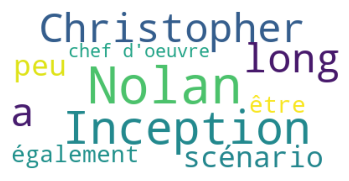

In [379]:
SW = stopwords.words('french')
# SW.append('')


WC=WordCloud(background_color = 'white',stopwords = SW,max_words = 10).generate(liste[0])


plt.imshow(WC)
plt.axis("off")
plt.show()

## Concaténation des deux df

In [380]:
df=pd.concat([df_sonic,df_inception])

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2905 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Note         2905 non-null   object
 1   Commentaire  2905 non-null   object
 2   key          2905 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 90.8+ KB


In [382]:
# Il n'y a pas de valeurs nulles
df.isnull().sum()

Note           0
Commentaire    0
key            0
dtype: int64

## Enregistrement du df dans un .csv

In [383]:
df = df.drop(["key"], axis=1)

In [384]:
df.to_csv('df.csv', index=False)

In [3]:
df_film = pd.read_csv('df.csv')

In [4]:
df_film

,Note,Commentaire
0,"4,0",une bonne suite pour les aventures de sonic au...
1,"5,0",Cette suite de sonic est incroyable !Le fan qu...
2,"4,0","Super film de ouf, le fait que Knuckles soit d..."
3,"4,0",Très bon film ont retrouve ce qui fait l’espri...
4,"2,5",Bon alors je trouve que la transposition de l'...
...,...,...
2900,"2,5",Agréablement surpris! Des effets spéciaux impr...
2901,"4,0",E-NOR-ME !!!!Le jeu de TOUS les acteurs est tr...
2902,"5,0",Qu'elle film!!Je conseil a tous ce chef d'oeuv...
2903,"5,0","Bon, DiCaprio commence vraiment à me gonfler! ..."


In [389]:
print(df_film['Commentaire'][0])

une bonne suite pour les aventures de sonic au cinéma deja le premier film était super bienun bon divertissement pour toute la famille avec un jim carrey en pleine formeune suite explosive trop cool
